(90000, 400) (400,)


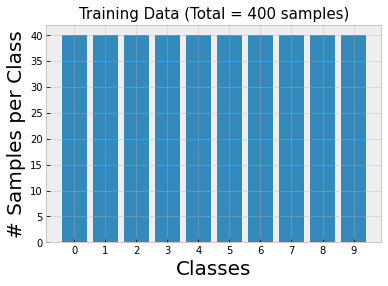

In [10]:
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dropout, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomCrop, MaxPooling2D, Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.layers import BatchNormalization
from numpy import mean, std 
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Loading Easy Test Data
data_train = np.load('data.npy') #Put your own Easy Test .npy file with dimensions(90000,N)
labels_train = np.load('labels.npy') #Put your own Easy Test Labels .npy file with dimensions(N)

print(data_train.shape, labels_train.shape)

# Counting number samples per class
vals, counts = np.unique(labels_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(10),range(10))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(data_train.shape[1])+' samples)',size=15);

# Displaying some examples per class

# for i in range(0,10):
#     rnd_sample = npr.permutation(np.where(labels_train==i)[0])
#     fig=plt.figure(figsize=(15,15))
#     for j in range(25):
#         fig.add_subplot(5,5,j+1)
#         plt.imshow(data_train[:,rnd_sample[j]].reshape((300,300)),cmap='gray')
#         plt.axis('off');plt.title('Class '+str(int(labels_train[rnd_sample[j]])),size=15)
#     plt.show()
#     print('\n\n')

In [11]:
import argparse
import skimage as sk
from skimage import transform
from skimage import util
import cv2

test_data_length = data_train.shape[1]

# load train and preprocess dataset
def load_test_data(length):
    # load dataset
    data_rgb = []
    kernel = np.ones((4,4),np.uint8)
    for i in range(length):
        data_rgb.append(data_train[:,i].reshape(300,300))
        data_rgb[i] = cv2.medianBlur(data_rgb[i], 3)
        data_rgb[i] = cv2.morphologyEx(data_rgb[i], cv2.MORPH_OPEN, kernel)
        data_rgb[i] = cv2.resize(data_rgb[i], (50,50), interpolation=cv2.INTER_AREA)
    data_rgb = np.array(data_rgb)
    print(data_rgb.shape)
    
    # reshape dataset to have a single channel
    data_rgb = data_rgb.reshape((data_rgb.shape[0], 50,50, 1))
    
    # one hot encode target values
    labels = to_categorical(labels_train)
    print(data_rgb.shape, labels.shape)
    return data_rgb, labels

In [12]:
# scale pixels
def prep_pixels(data):
    # convert from integers to floats
    data = data.astype('float32')
    
    # he_uniformize to range 0-1
    data_norm = (data) / 255.0
    
    # return he_uniformized images
    return data_norm

In [13]:
model = load_model('Final_CNN') #Loading our trained model

In [14]:
test_data, test_label = load_test_data(test_data_length)
    
# prepare pixel data
test_data = prep_pixels(test_data)

(400, 50, 50)
(400, 50, 50, 1) (400, 10)


### In the cell below we are making predictions on the Easy Test set loaded above and will also plot the wrong predicted images with their predicted and correct label

(400, 10) (400, 10)
(400, 10)
[] (0,)





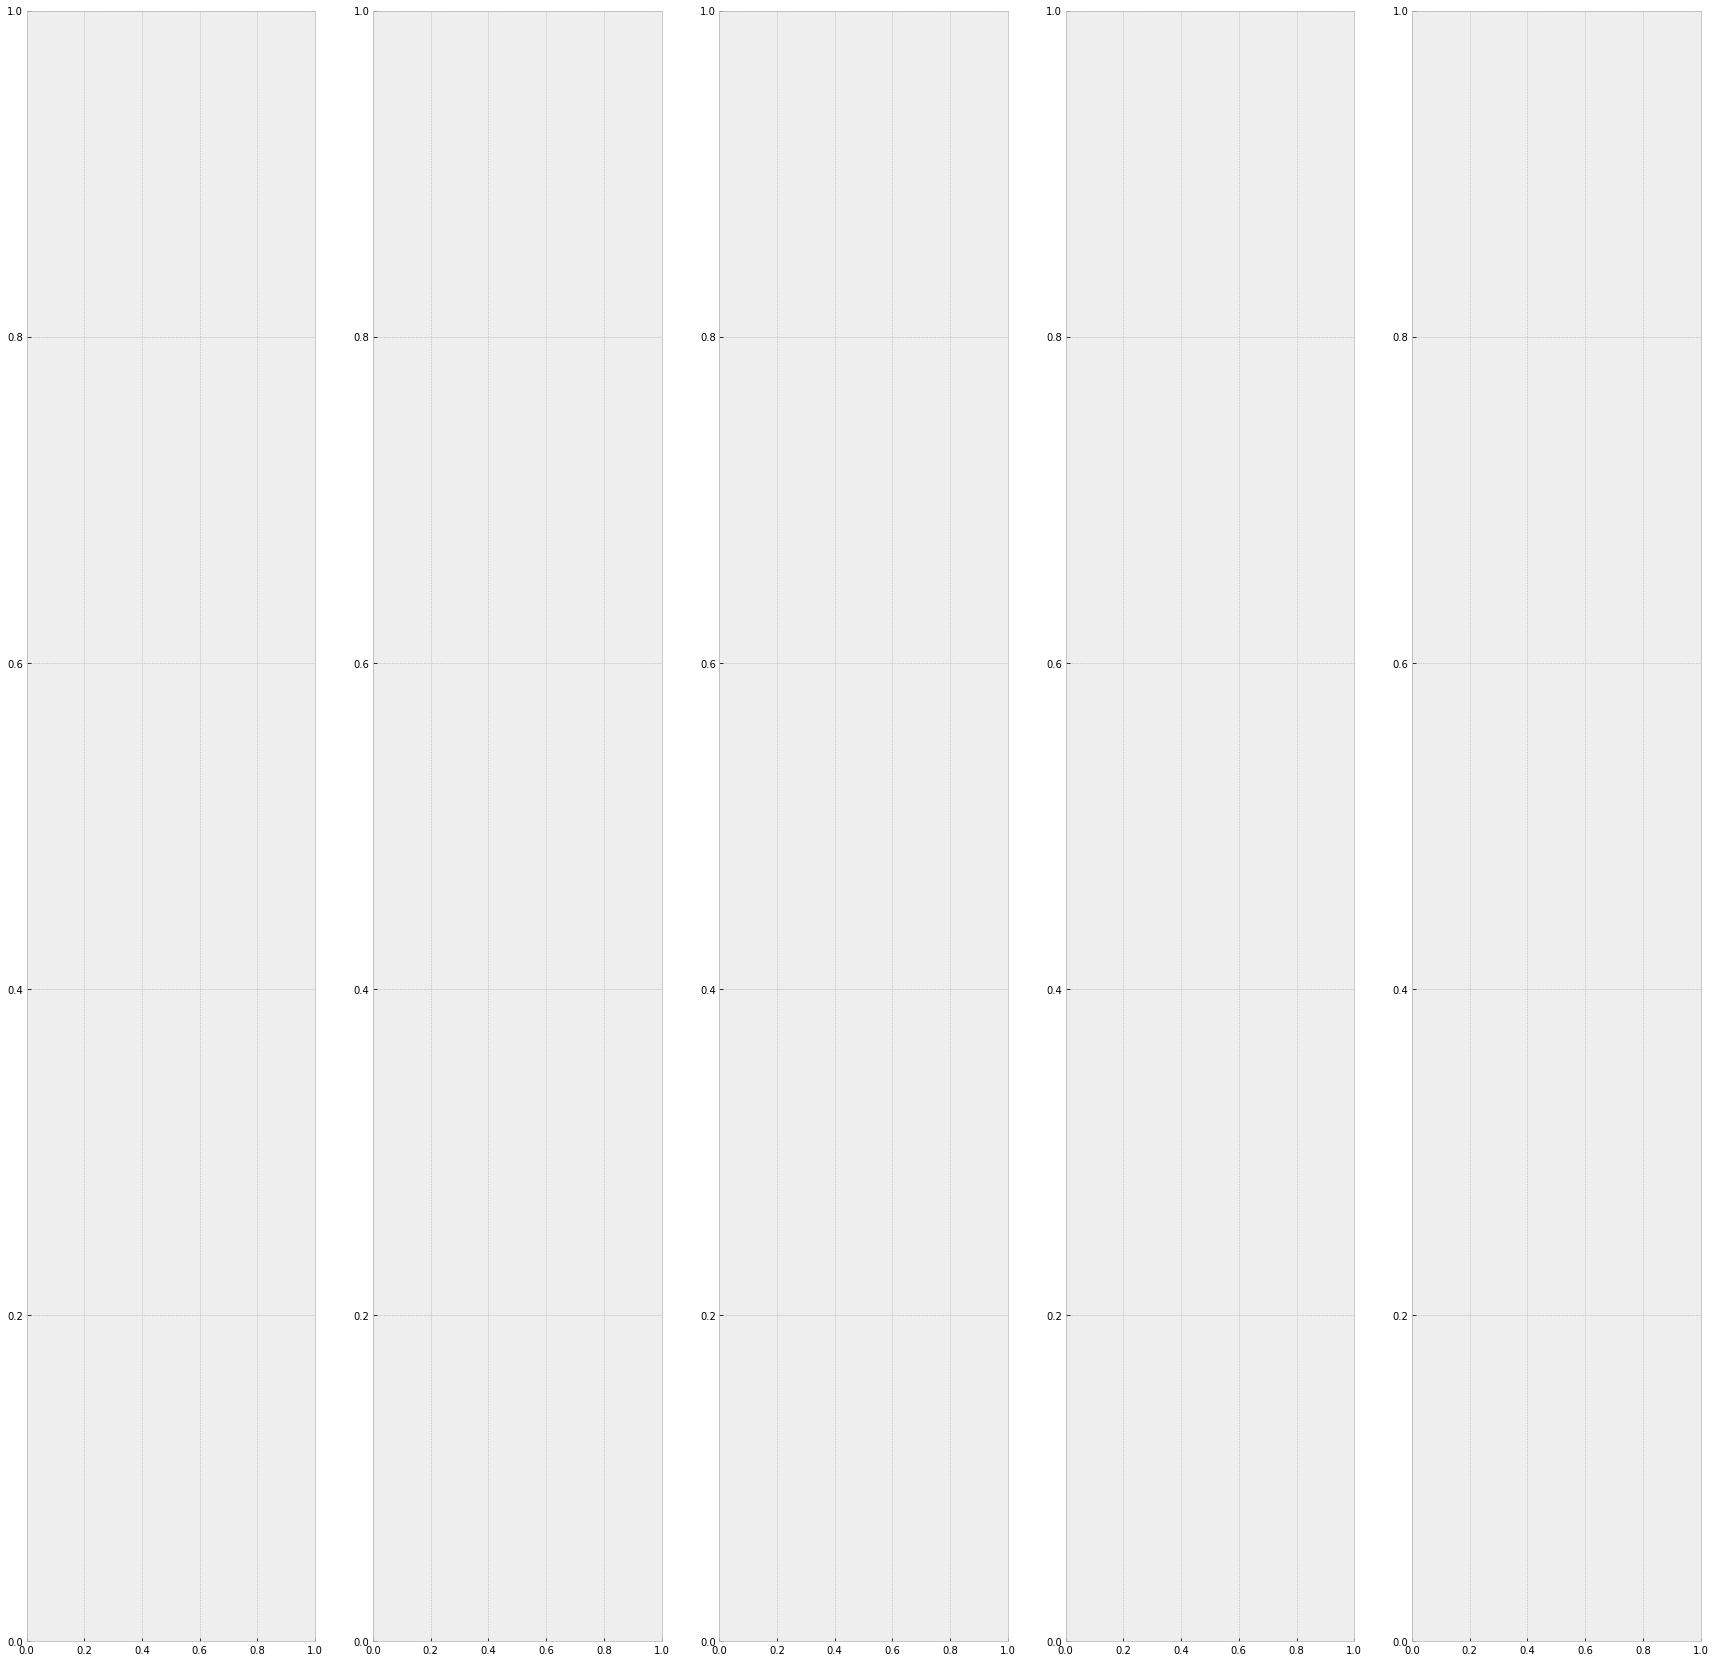

In [15]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'$',9:'#'}
pred = model.predict(test_data) 
print(test_label.shape, pred.shape)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(test_label, axis=1)
wr = []
index = []
te = []
te = np.array(test_label)
print(te.shape)
for b in range(test_data_length):
    wr.append(np.argmax(pred[b]))
    if wr[b] != np.argmax(te[b]):
        index.append(b)
wr= np.array(wr)
index = np.array(index)
print(index, index.shape)
fig, axes = plt.subplots((len(index)//5)+1,5, figsize=(30,30))
axes = axes.flatten()
h = 0
for i,ax in enumerate(axes):
    if h == len(index):
        break
    img = np.reshape(test_data[index[h]], (50,50))
    cr = np.argmax(te[index[h]])
    ax.imshow(img, cmap="Greys")
   
    pred_lb = word_dict[wr[index[h]]]
    h = h + 1
    ax.set_title("Pr: "+pred_lb+"  Act: "+word_dict[cr])
    ax.grid()
print("\n\n")

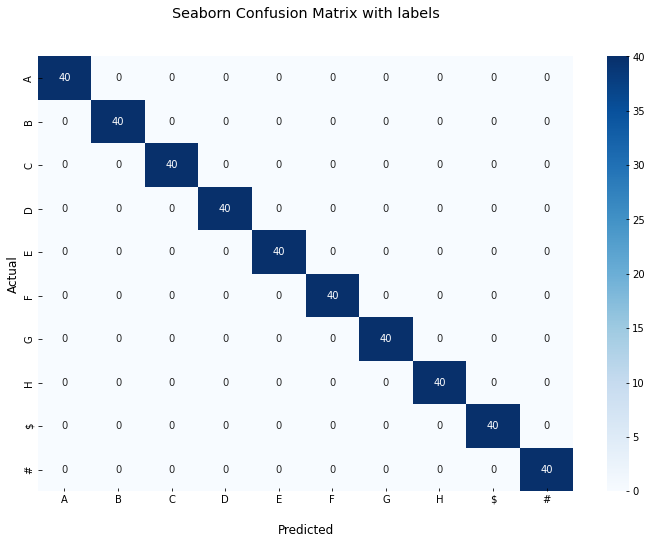

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
ax = sns.heatmap(confusion_matrix(y_true, y_pred), fmt='d', annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['A','B','C','D','E','F','G','H','$','#'])
ax.yaxis.set_ticklabels(['A','B','C','D','E','F','G','H','$','#'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [17]:
prediction = []
for i in range(test_data_length):
    prediction.extend([y_true[i], y_pred[i]])
prediction = np.array(prediction)
prediction = np.reshape(prediction, (test_data_length,2))
df = pd.DataFrame (prediction, columns = ['TRUE LABEL', 'LABEL PREDICTED'])
df #This dataframe contains true and predicted labels for all images

,TRUE LABEL,LABEL PREDICTED
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
395,5,5
396,6,6
397,7,7
398,8,8


In [18]:
print("ACCURACY on Easy Test Set : - ", accuracy_score(y_true, y_pred))

ACCURACY on Easy Test Set : -  1.0
